In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime

In [5]:
df = pd.read_csv('BRCA.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

# New Section

# New Section

In [7]:
# Check for missing values
print(df.isnull().sum())

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64


In [8]:
# Fill missing numerical values with the mean  Impute Numerical Columns
# For numerical columns like Age and Protein levels, we can fill missing values with the mean (or median).
numerical_columns = ['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4']
for column in numerical_columns:
    df[column].fillna(df[column].mean(), inplace=True)


In [9]:
# Impute Categorical Columns
# For categorical columns like Gender, Tumour_Stage, etc., you can fill missing values with the mode (most frequent value).
# Fill missing categorical values with the mode
categorical_columns = ['Gender', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type']
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [10]:
print(df.isnull().sum())

Patient_ID             7
Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64


In [11]:
#Date_of_Surgery: Since surgery date is critical, consider dropping rows where this is missing if feasible,
#as it's necessary for time-related analysis.
# Drop rows where Date_of_Surgery is missing
df.dropna(subset=['Date_of_Surgery'], inplace=True)


In [12]:
#Date_of_Last_Visit: Impute missing values with a date indicating no further visits or a specific handling for missing dates.
# Impute missing Date_of_Last_Visit with a specific date or another appropriate strategy
df['Date_of_Last_Visit'].fillna('No Further Visit', inplace=True)


In [13]:
# Patient_Status
# Impute missing Patient_Status with a specific category or another appropriate strategy
df['Patient_Status'].fillna('Unknown', inplace=True)


In [14]:
# Check for missing Patient_ID values
missing_patient_ids = df[df['Patient_ID'].isnull()]

# If missing Patient_IDs are found and we decide to impute them with sequential IDs
if not missing_patient_ids.empty:
    df['Patient_ID'].fillna(value=pd.Series(range(1, len(missing_patient_ids) + 1)), inplace=True)


In [15]:
# Check for missing values again
print(df.isnull().sum())


Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64


In [16]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load our dataset (assuming we have already loaded the dataset into a DataFrame named 'df')
# df = pd.read_csv('your_dataset.csv')

# Display the first few rows to understand the structure of the data
print(df.head())

# Identify columns with missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

# Define columns that need imputation (for simplicity, we'll assume numerical columns)
numerical_columns = ['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4']

# Create an imputer object with a strategy to fill missing values (mean for numerical columns)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the data
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

# Verify that missing values are handled
missing_values_after = df.isnull().sum()
print("Missing Values After Imputation:\n", missing_values_after)



     Patient_ID   Age  Gender  Protein1  Protein2  Protein3  Protein4  \
0  TCGA-D8-A1XD  36.0  FEMALE  0.080353   0.42638   0.54715  0.273680   
1  TCGA-EW-A1OX  43.0  FEMALE -0.420320   0.57807   0.61447 -0.031505   
2  TCGA-A8-A079  69.0  FEMALE  0.213980   1.31140  -0.32747 -0.234260   
3  TCGA-D8-A1XR  56.0  FEMALE  0.345090  -0.21147  -0.19304  0.124270   
4  TCGA-BH-A0BF  56.0  FEMALE  0.221550   1.90680   0.52045 -0.311990   

  Tumour_Stage                      Histology ER status PR status HER2 status  \
0          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
1           II             Mucinous Carcinoma  Positive  Positive    Negative   
2          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
3           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
4           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   

                  Surgery_type Date_of_Surgery Date_of_Last_Visit  \
0  Mo

In [17]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Print columns with missing values
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])


Columns with Missing Values:
Series([], dtype: int64)


In [18]:
# Drop columns with missing values
columns_to_drop = ['Patient_ID', 'Date_of_Surgery', 'Date_of_Last_Visit']
df_cleaned = df.drop(columns=columns_to_drop)

# Confirm columns have been dropped
print("Columns after dropping:")
print(df_cleaned.columns)

# Assuming df_cleaned is our DataFrame after handling missing values and encoding
columns_to_drop = ['ER status', 'PR status']
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

# Confirm columns have been dropped
print("Columns after dropping ER status and PR status:")
print(df_cleaned.columns)



Columns after dropping:
Index(['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
       'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status',
       'Surgery_type', 'Patient_Status'],
      dtype='object')
Columns after dropping ER status and PR status:
Index(['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
       'Tumour_Stage', 'Histology', 'HER2 status', 'Surgery_type',
       'Patient_Status'],
      dtype='object')


In [19]:
# Importing necessary library
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each column
for col in df_cleaned.columns:
    # Check if the column is categorical (object type)
    if df_cleaned[col].dtype == 'object':
        # Encode categorical column
        df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col].astype(str))

# Displaying the encoded DataFrame
print("Encoded DataFrame:")
print(df_cleaned.head())



# Assuming df is our DataFrame and 'Tumour_Stage' is the column with tumor stages

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Tumour_Stage' column
df['Tumour_Stage_encoded'] = label_encoder.fit_transform(df['Tumour_Stage'])

# Check the mapping
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))



Encoded DataFrame:
    Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  \
0  36.0       0  0.080353   0.42638   0.54715  0.273680             2   
1  43.0       0 -0.420320   0.57807   0.61447 -0.031505             1   
2  69.0       0  0.213980   1.31140  -0.32747 -0.234260             2   
3  56.0       0  0.345090  -0.21147  -0.19304  0.124270             1   
4  56.0       0  0.221550   1.90680   0.52045 -0.311990             1   

   Histology  HER2 status  Surgery_type  Patient_Status  
0          0            0             1               0  
1          2            0             0               1  
2          0            0             2               0  
3          0            0             1               0  
4          0            0             2               1  
{'I': 0, 'II': 1, 'III': 2}


In [20]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Select columns to scale (all except Patient_Status if it's your target variable)
columns_to_scale = ['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4']

# Fit and transform the selected columns
df_cleaned[columns_to_scale] = scaler.fit_transform(df_cleaned[columns_to_scale])

# Display the scaled DataFrame
print("Scaled DataFrame:")
print(df_cleaned.head())

# Using pandas get_dummies to one-hot encode
df = pd.get_dummies(df, columns=['Tumour_Stage'], drop_first=True)



Scaled DataFrame:
        Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  \
0 -1.768397       0  0.196083 -0.571825  1.090802  0.420085             2   
1 -1.227513       0 -0.693617 -0.405183  1.206017 -0.065791             1   
2  0.781481       0  0.433539  0.400434 -0.406070 -0.388592             2   
3 -0.223016       0  0.666522 -1.272551 -0.175999  0.182214             1   
4 -0.223016       0  0.446991  1.054525  1.045106 -0.512344             1   

   Histology  HER2 status  Surgery_type  Patient_Status  
0          0            0             1               0  
1          2            0             0               1  
2          0            0             2               0  
3          0            0             1               0  
4          0            0             2               1  


In [21]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_cleaned.drop(columns=['Patient_Status'])
y = df_cleaned['Patient_Status']

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting sets
print(f"Training set - X shape: {X_train.shape}")
print(f"Training set - y shape: {y_train.shape}")
print(f"Testing set - X shape: {X_test.shape}")
print(f"Testing set - y shape: {y_test.shape}")


Training set - X shape: (233, 10)
Training set - y shape: (233,)
Testing set - X shape: (101, 10)
Testing set - y shape: (101,)


In [24]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_cleaned is our DataFrame with encoded and cleaned data
corr_matrix = df_cleaned.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)


Correlation Matrix:
                     Age    Gender  Protein1  Protein2  Protein3  Protein4  \
Age             1.000000  0.024362 -0.050638 -0.021542 -0.039686  0.094214   
Gender          0.024362  1.000000  0.150601  0.000715 -0.017694 -0.014290   
Protein1       -0.050638  0.150601  1.000000  0.238141 -0.129482  0.280343   
Protein2       -0.021542  0.000715  0.238141  1.000000 -0.415825  0.088239   
Protein3       -0.039686 -0.017694 -0.129482 -0.415825  1.000000  0.065316   
Protein4        0.094214 -0.014290  0.280343  0.088239  0.065316  1.000000   
Tumour_Stage   -0.167654  0.033369 -0.050201 -0.051786  0.038271 -0.037264   
Histology      -0.108969  0.032733  0.069494  0.005117 -0.001745  0.017252   
HER2 status    -0.069589 -0.033949 -0.029940 -0.012203 -0.019827  0.003046   
Surgery_type   -0.026762  0.024977 -0.124907 -0.052072 -0.056364 -0.129834   
Patient_Status  0.010747 -0.005320 -0.032153  0.033538  0.039961  0.063343   

                Tumour_Stage  Histology  HE

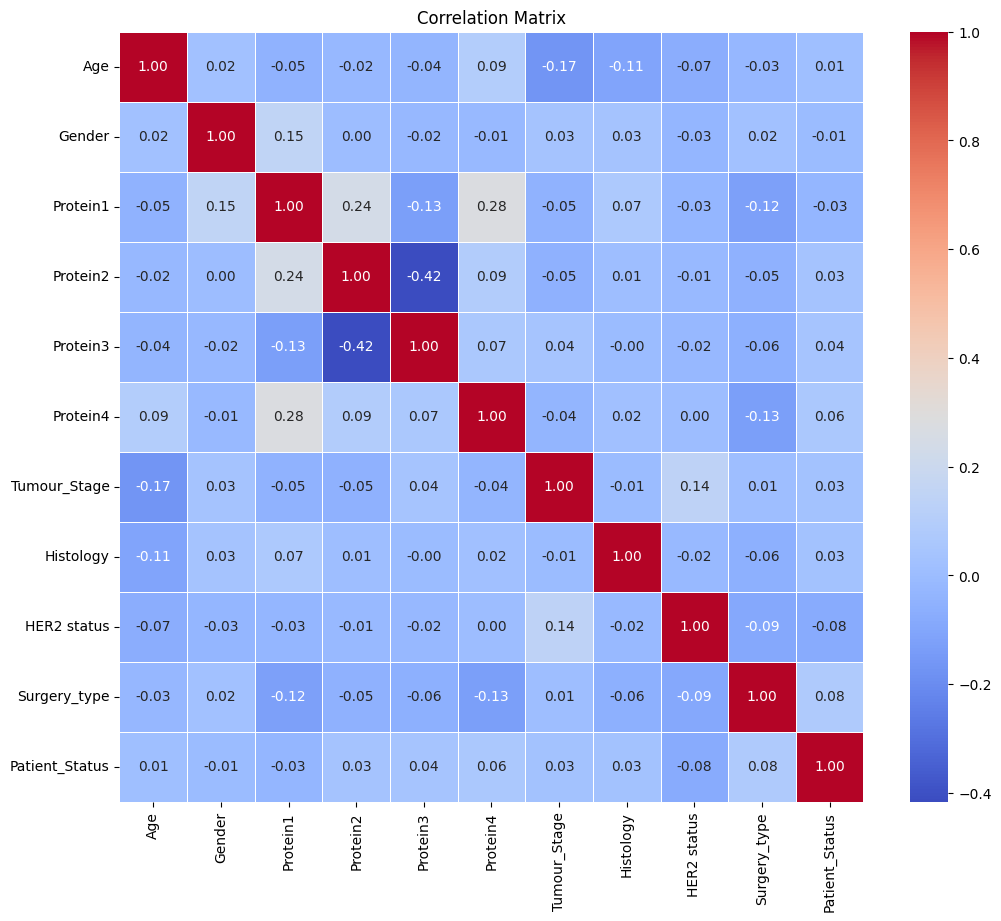

In [25]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [28]:
from sklearn.svm import SVC
# 1. Extract selected features from df_cleaned
X_selected = df_cleaned[['Protein2', 'Protein4', 'Tumour_Stage']]

# 2. Extract target variable from df_cleaned
y = df_cleaned['Patient_Status']

# 3. Handle missing values if any (assuming already handled in df_cleaned)

# 4. Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# 4. Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Initialize SVM classifier
model = SVC(kernel='linear', random_state=42)  # You can choose different kernels like 'rbf', 'poly', etc.

# Train the model
model.fit(X_train, y_train)

# 6. Evaluate model performance (using accuracy only)
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")


Accuracy: 0.7821782178217822


In [57]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score


# 1. Extract selected features from df_cleaned
X_selected = df_cleaned[['Protein2', 'Protein4', 'Tumour_Stage']]

# 2. Extract target variable from df_cleaned
y = df_cleaned['Patient_Status']

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# 4. Initialize SVM classifier
svm_model = SVC(kernel='linear', random_state=42)  # You can choose different kernels like 'rbf', 'poly', etc.

# 5. Initialize BaggingClassifier with SVM as base estimator
bagging_model = BaggingClassifier(base_estimator=svm_model, n_estimators=10, random_state=42)

# 6. Train the BaggingClassifier
bagging_model.fit(X_train, y_train)


# 7. Evaluate model performance (using accuracy and F1 score)
y_pred = bagging_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Calculate F1 score

print(f"Accuracy with Bagging: {accuracy*100:.2f}%")
print(f"F1 Score with Bagging: {f1:.4f}")




Accuracy with Bagging: 78.22%
F1 Score with Bagging: 0.6866


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
